In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [21]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [23]:
for column in train_data.columns:
    if train_data[column].dtype == "object":
        train_data[column] = train_data[column].fillna(train_data[column].mode()[0])
        if column in test_data.columns:
            test_data[column] = test_data[column].fillna(test_data[column].mode()[0])
    else:
        train_data[column] = train_data[column].fillna(train_data[column].mean())
        if column in test_data.columns:
            test_data[column] = test_data[column].fillna(test_data[column].mean())

features = ["GrLivArea", "BedroomAbvGr", "FullBath", "HalfBath", "TotRmsAbvGrd"]
x = train_data[features]
y = train_data["SalePrice"]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [25]:
y_pred=model.predict(x_val)
mae=mean_absolute_error(y_val,y_pred)
mse=mean_squared_error(y_val,y_pred)
r2=r2_score(y_val,y_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

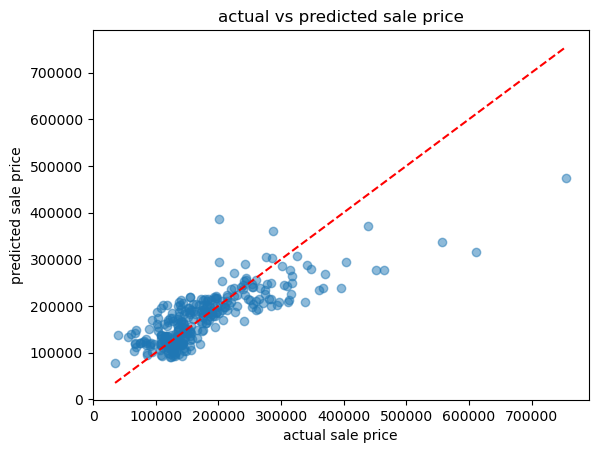

In [27]:
plt.figure(figure=(10,6))
plt.scatter(y_val,y_pred,alpha=0.5)
plt.xlabel("actual sale price")
plt.ylabel("predicted sale price")
plt.title("actual vs predicted sale price")
plt.plot([y.min(),y.max()],[y.min(),y.max()],"r--")
plt.show

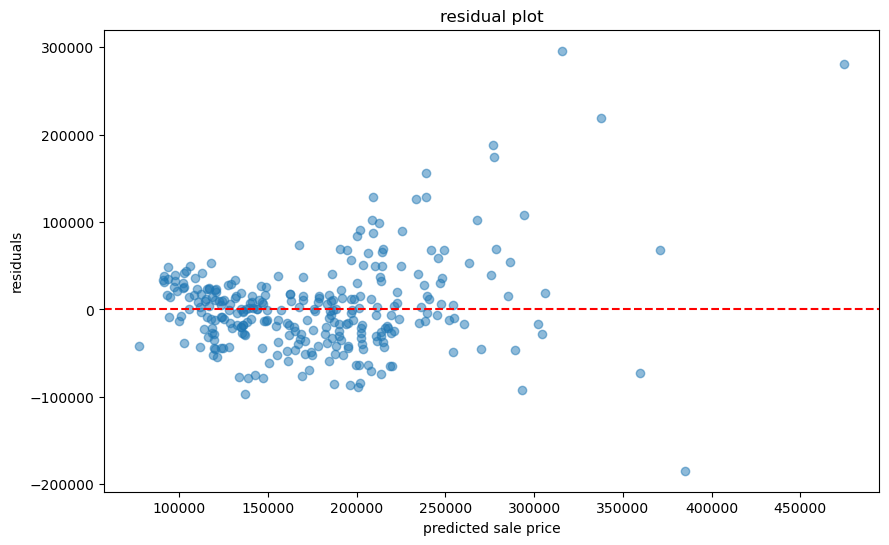

In [18]:
residuals=y_val - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals,alpha=0.5)
plt.xlabel("predicted sale price")
plt.ylabel("residuals")
plt.title("residual plot")
plt.axhline(y=0,color="r",linestyle="--")
plt.show()

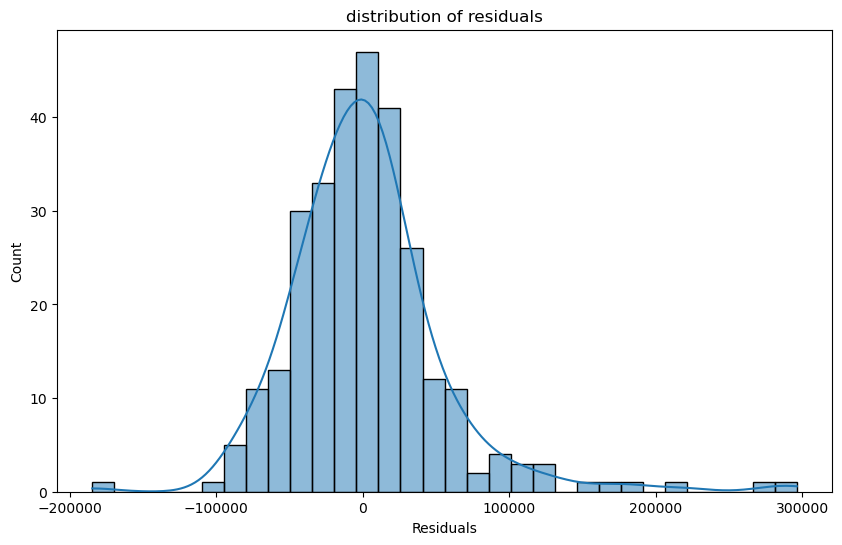

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(residuals,kde=True)
plt.xlabel("Residuals")
plt.title("distribution of residuals")
plt.show()

<Figure size 1200x800 with 0 Axes>

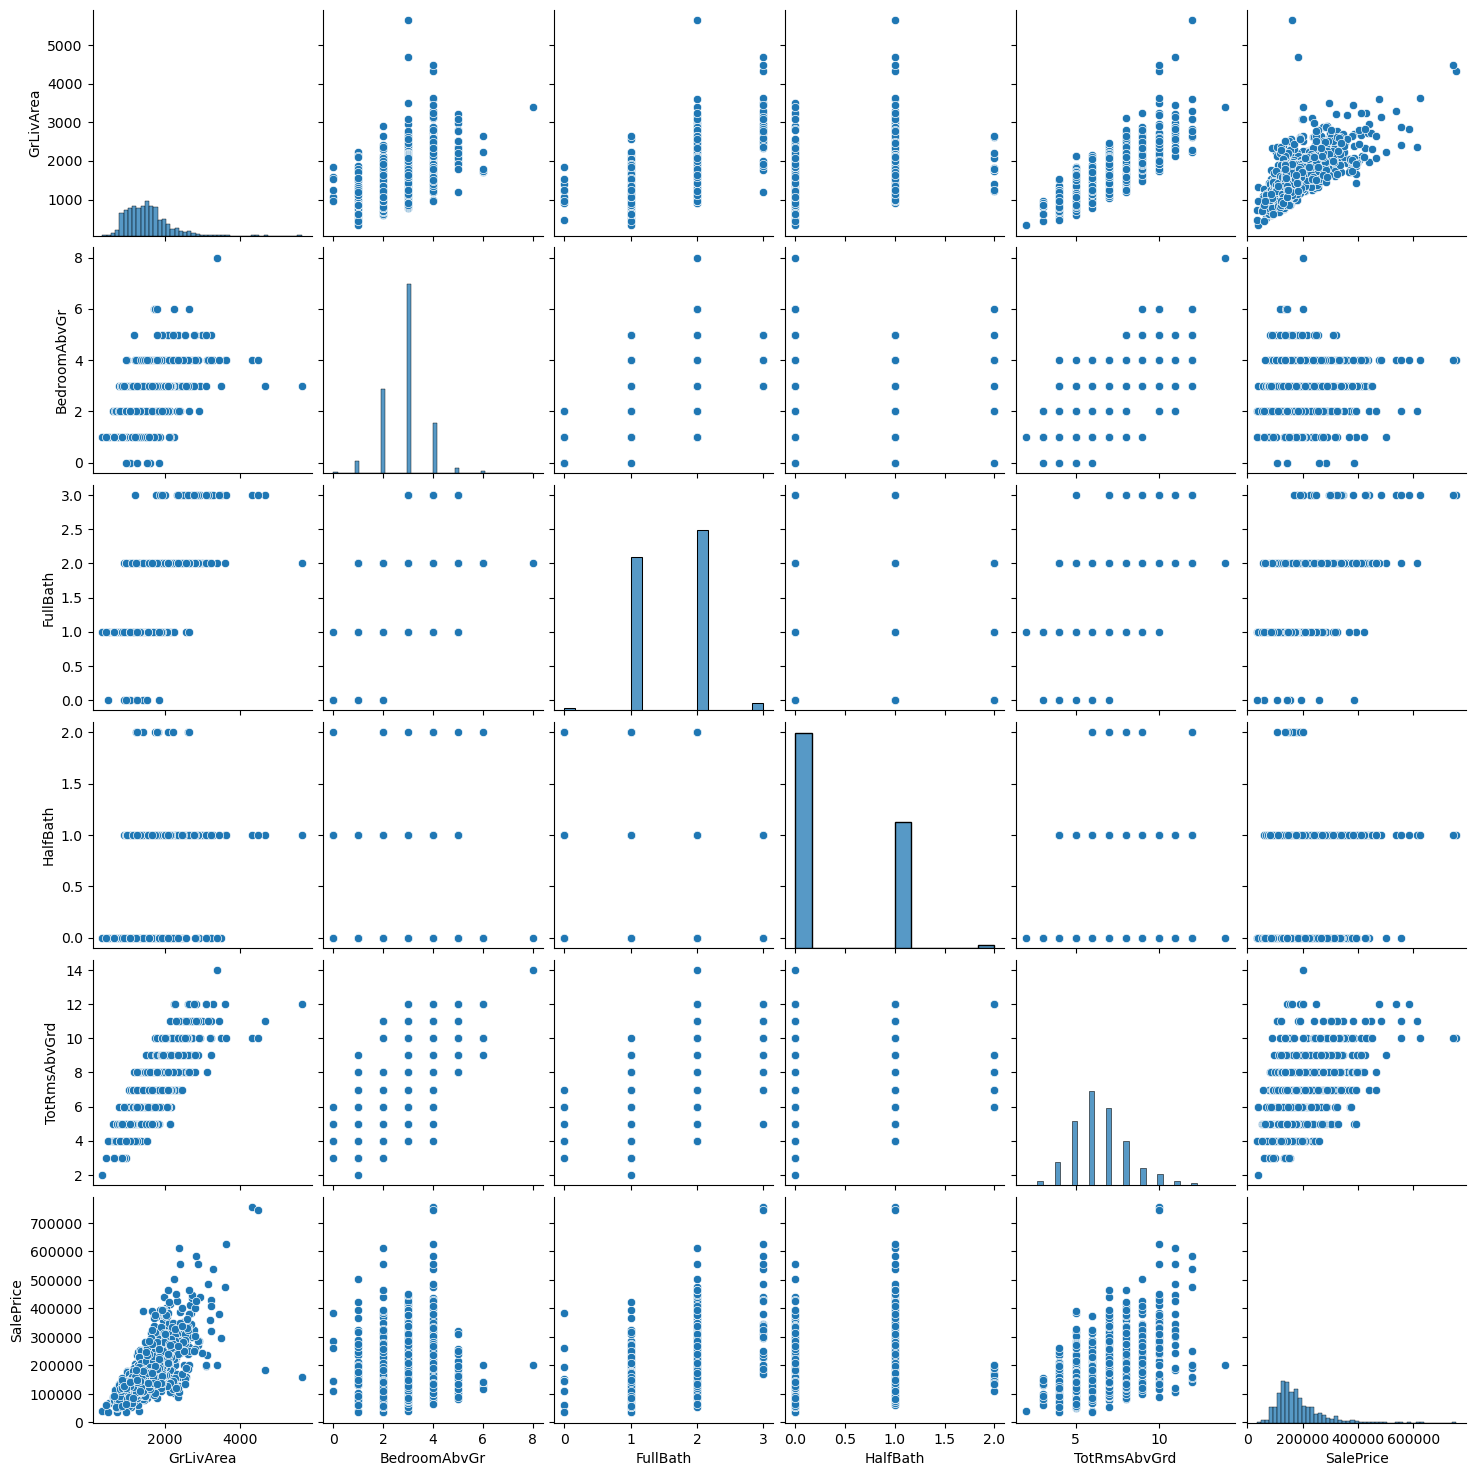

In [26]:
plt.figure(figsize=(12,8))
sns.pairplot(train_data[features+["SalePrice"]])
plt.show()

In [38]:
example=pd.DataFrame({
    "GrLivArea":[2000],
    "BedroomAbvGr":[3],
    "FullBath":[2],
    "HalfBath":[1],
    "TotRmsAbvGrd":[7]
})
example_prediction=model.predict(example)
print(f"example prediction:${example_prediction[0]:,.2f}")
x_test=test_data[features]
test_predictions=model.predict(x_test)
submission=pd.DataFrame({"Id":test_data["Id"],"SalePrice":test_predictions})
submission.to_csv("submission.csv",index=False)

example prediction:$240,896.28
